# Redes Neuronales

La clases MLPClassifier y MLPRegressor de sklearn nos permite implementar redes neuronales sencillas.

#

MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)</font>

#


MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)</font>

Por ahora, solo nos vamos a enfocar en unos pocos parámetros.

#


MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)</font>


MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)</font>

Parámetros:
* hidden_layer_sizes: tupla con el número de neuronas para cada capa oculta.
* activation: Función de activación ‘identity’, ‘logistic’, ‘tanh’, ‘relu’
* solver: "método de gradiente" a utilizar: ‘lbfgs’ (quasi-Newton methods), ‘sgd’ (stochastic gradiente descendent), ‘adam’.
* batch_size: tamaño del batch, “auto $\Rightarrow$, batch_size=min(200, n_samples).
* learning_rate_init: tasa de aprendizaje del algoritmo gradiente descendiente.
* max_iter: número de épocas

Funciones:
* fit(X,y): entrena el modelo usando la matriz de datos X y la variable binaria y.

In [1]:
#hidden_layer_sizes

import numpy as np
import pandas as pd
from plotnine import *

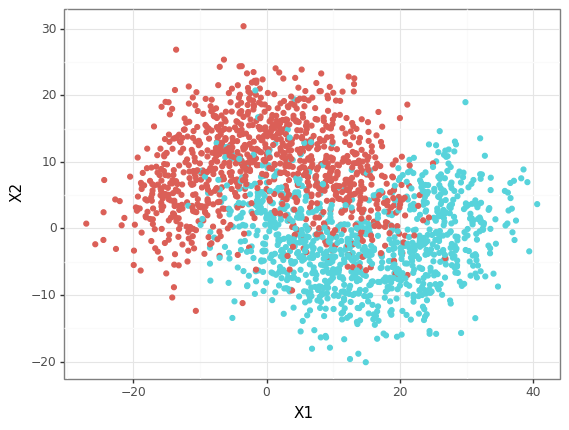

,Fill,Class,X1,X2
0,Red,1,17.880899,-9.486892
1,Red,1,0.638066,3.917703
2,Blue,0,13.841861,10.179272
3,Red,1,14.618589,-4.179969
4,Red,1,6.090262,-13.052152
...,...,...,...,...
1995,Red,1,-0.629457,-3.422124
1996,Blue,0,-11.372828,6.790093
1997,Blue,0,8.193757,23.264735
1998,Blue,0,-5.423396,0.517909


In [2]:
#FEED FORWARD Data de luna
from sklearn.datasets import make_moons
newData=make_moons(2000,noise=0.35)
data=pd.DataFrame(newData[0]*14)
data.insert(0,"Class",newData[1])
data.insert(0,"Fill","0")
data.columns=['Fill','Class','X1','X2']
data.iloc[data.Class==1,0]="Red"
data.iloc[data.Class==0,0]="Blue"
print(ggplot(data)+aes(x="X1",y="X2",color="factor(Class)")+geom_point(show_legend=False)+theme_bw())
data

In [3]:
#Creando y entrenando un modelo
from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier(hidden_layer_sizes=(10,),max_iter=500)

modelo.fit(data.iloc[:,2:4], data.iloc[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)

# Atributos de la red entrenada
<font color="blue">
MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)</font>

<font color="blue">
MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)</font>

Atributos:
* loss_: el valor de la función de perdida actual.
* best_loss_: el mejor valor alcazado en la función de perdida.
* loss_curve_: todos los valores de la función de perdida.
* coefs_[i]: El vector de pesos correspondiente a la capa i
* intercepts_[i]: El vector de pesos de los sesgos correspondiente a la capa i
* out_activation_: Función de activación de salida.

In [4]:
print("Función de activicación de salida",modelo.out_activation_)
#Error final del modelo (entrenamiento)
print("Error de entrenamiento final:",modelo.loss_)
#Mejor error del modelo (entrenamiento)
print("Mejor error de entrenamiento:",modelo.best_loss_)

Función de activicación de salida logistic
Error de entrenamiento final: 0.30355288033565075
Mejor error de entrenamiento: 0.30355288033565075


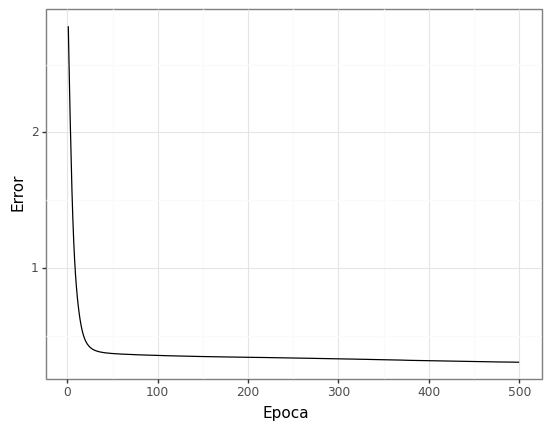

<ggplot: (8789861419229)>

In [5]:
#Curva de aprendizaje
tempDF=pd.DataFrame(modelo.loss_curve_,columns=["Error"])
tempDF["Epoca"]=range(1,tempDF.shape[0]+1)
ggplot(tempDF)+aes(x="Epoca",y="Error")+theme_bw()+geom_line()


In [ ]:
print("Sesgo para cada neurona")
print("Recordar que la primera oculta capa tiene 10 neuronas (10 sesgos/pesos)")
print("Número de sesgos, primera capa:",modelo.intercepts_[0].shape)
print("Recordar que la segunda oculta capa (capa de salida) tiene 1 neurona (1 sesgo/peso)")
print("Número de sesgos, segunda capa:",modelo.intercepts_[1].shape)
modelo.intercepts_

In [ ]:
print("Sesgo para cada neurona")
print("Recordar que la capa de entrada tiene 2 neuronas y la primera capa oculta 10 neuronas")
print("Número de pesos, para la primera capa oculta:",modelo.coefs_[0].shape)
print("Recordar que la capa de salida tiene 1 neurona")
print("Número de pesos, para la primera capa oculta:",modelo.coefs_[1].shape)
modelo.coefs_


# Usando el modelo para predecir

<font color="blue">
MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)</font>

<font color="blue">
MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)</font>

Funciones:
* fit(X,y): entrena el modelo usando la matriz de datos X y la variable binaria y.
* predict(X): Predice el valor y usando los valores X.
* predict_proba(X): Predice la probabilidad del valor y usando los valores X.

In [6]:
#Prediciendo los datos de entrenamiento
print(modelo.predict(data.iloc[:,2:4]))

#Calculando la probabildiad para los datos de entrenamiento
print(modelo.predict_proba(data.iloc[:,2:4]))

[1 1 0 ... 0 1 0]
[[0.0255858  0.9744142 ]
 [0.32565965 0.67434035]
 [0.81511951 0.18488049]
 ...
 [0.98048131 0.01951869]
 [0.37780461 0.62219539]
 [0.98556758 0.01443242]]


# Visualizando la predicción

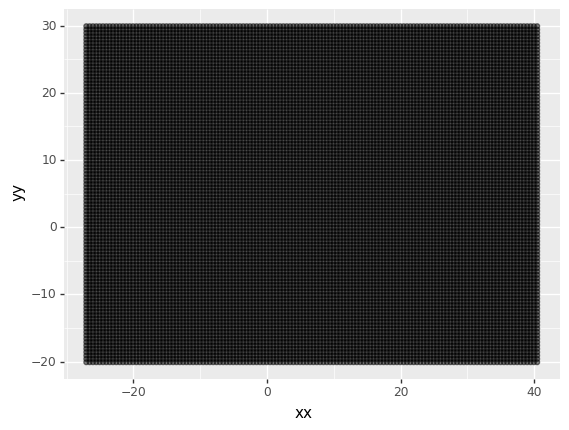

<ggplot: (8789863155817)>

In [7]:
#Creando el dataset de test
x = np.arange(min(data.X1),max(data.X1),0.5)
y = np.arange(min(data.X2),max(data.X2),0.5)
temp = np.meshgrid(x, y)
df=pd.DataFrame(temp[0].flatten(),columns=["xx"])
df.insert(1,"yy",temp[1].flatten())
#Creando una grilla de test para evaluar cada punto
ggplot(df)+aes(x='xx',y='yy')+geom_point(alpha=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- xx
- yy
Feature names seen at fit time, yet now missing:
- X1
- X2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_tile : Removed 2720 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 45 rows containing missing values.


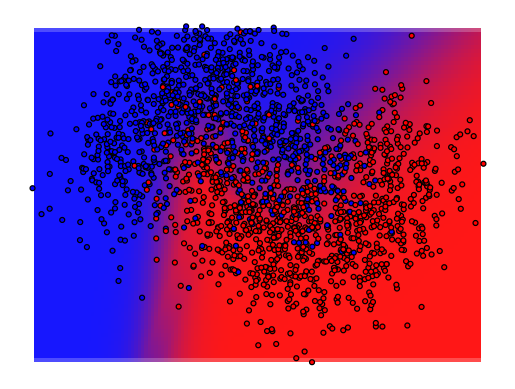

<ggplot: (8789858538409)>

In [8]:
#Creando el dataframe a graficar
from plotnine import *
output=modelo.predict_proba(df)
df.insert(0,"Class",output[:,0])
df.columns=['Class','X1','X2']

#Creando el dataframe a graficar
output2=(((1-output[:,1])*255).astype("int"))
df.insert(3, "ClassOutput", "0")
for i in range(df.shape[0]):
    df.ClassOutput[i]='#%02x%02x%02x' % (255-output2[i],0,output2[i])

#Generating the plot with ggplot/plotnine
blankDF = pd.DataFrame(columns=[""])
pp=(ggplot(blankDF)+theme_void()+
  geom_tile(aes(x=df.X1.values,y=df.X2.values),alpha=0.7,show_legend=False,fill=df.ClassOutput)+    
  geom_point(aes(x=data.X1.values,y=data.X2.values),show_legend = False,color="black",fill=data.Fill)+
  scale_x_continuous(limits = [min(data.X1),max(data.X1)])+scale_y_continuous(limits = [-min(data.X2),min(data.X2)])
)
pp



# Comparando distintos parámetros
## Arquitecturas, épocas, y funciones de activación
### Recordar que el error en el ejemplo anterior llegó a menos de 0.3
### Ojo, que la data tendrá más ruido ahora
Recordar activation={‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

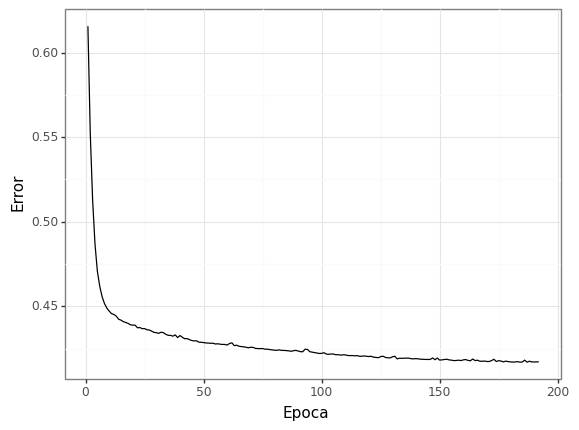

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- xx
- yy
Feature names seen at fit time, yet now missing:
- X1
- X2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_tile : Removed 322 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


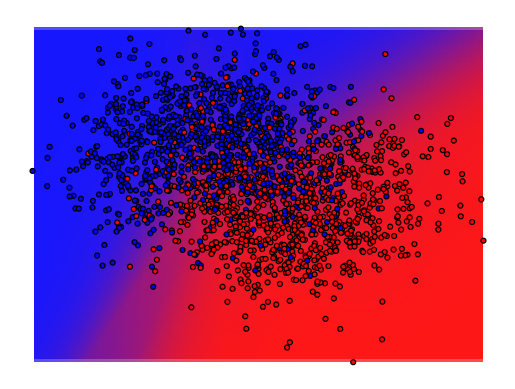

<ggplot: (8789858316809)>

In [9]:
#Creando y entrenando un modelo
newData=make_moons(2000,noise=0.50) 
data=pd.DataFrame(newData[0]*14)
data.insert(0,"Class",newData[1])
data.insert(0,"Fill","0")
data.columns=['Fill','Class','X1','X2']
data.iloc[data.Class==1,0]="Red"
data.iloc[data.Class==0,0]="Blue"


from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier(hidden_layer_sizes=(10,10),activation="relu", max_iter=500)
modelo.fit(data.iloc[:,2:4], data.iloc[:,1])

#Curva de aprendizaje
tempDF=pd.DataFrame(modelo.loss_curve_,columns=["Error"])
tempDF["Epoca"]=range(1,tempDF.shape[0]+1)
print(ggplot(tempDF)+aes(x="Epoca",y="Error")+theme_bw()+geom_line())


#Creando el dataset de test
x = np.arange(min(data.X1),max(data.X1),0.5)
y = np.arange(min(data.X2),max(data.X2),0.5)
temp = np.meshgrid(x, y)
df=pd.DataFrame(temp[0].flatten(),columns=["xx"])
df.insert(1,"yy",temp[1].flatten())

#Creando el dataframe a graficar
from plotnine import *
output=modelo.predict_proba(df)
df.insert(0,"Class",output[:,0])
df.columns=['Class','X1','X2']

#Creando el dataframe a graficar
output2=(((1-output[:,1])*255).astype("int"))
df.insert(3, "ClassOutput", "0")
for i in range(df.shape[0]):
    df.ClassOutput[i]='#%02x%02x%02x' % (255-output2[i],0,output2[i])

#Generating the plot with ggplot/plotnine
blankDF = pd.DataFrame(columns=[""])
pp=(ggplot(blankDF)+theme_void()+
  geom_tile(aes(x=df.X1.values,y=df.X2.values),alpha=0.7,show_legend=False,fill=df.ClassOutput)+    
  geom_point(aes(x=data.X1.values,y=data.X2.values),show_legend = False,color="black",fill=data.Fill)+
  scale_x_continuous(limits = [min(data.X1),max(data.X1)])+scale_y_continuous(limits = [-min(data.X2),min(data.X2)])
)
pp




# Dataset de donut

In [ ]:
#Creando dataset de dona
from sklearn.datasets import make_circles
import numpy as np
np.random.seed(0)
samples, labels = make_circles(n_samples=1000, factor=.3, noise=.05)
data=pd.DataFrame(samples)
data.columns=['X1','X2']
data.insert(2, "Class",labels)
data.insert(3, "Fill",labels)
data.iloc[data.Class==1,3]="Red"
data.iloc[data.Class==0,3]="Blue"
ggplot(data)+aes(x="X1",y="X2",color="Fill")+theme_bw()+geom_point(show_legend=False)

In [ ]:
#Creating and training a model
from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier(hidden_layer_sizes=(10),activation="relu", max_iter=500)
modelo.fit(data.iloc[:,0:2], data.iloc[:,2])

#Evaluando el modelo
import numpy as np
x = np.arange(-1.5, 1.5, 0.05)
y = np.arange(-1.5, 1.5, 0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten())
dataTest.insert(1,"yy",temp[1].flatten())
output=modelo.predict_proba(dataTest.iloc[:,[0,1]])


#Creando el data Frame a graficar
from plotnine import *
df = pd.DataFrame(dataTest)
df.insert(2, "ClassOutput", 1-output[:,0])
df.columns=['X1','X2','Class']
#df.insert(3, "Class2", pd.qcut(df.Class, q=7, labels=False, precision=0))
output=(((1-output)*255).astype("int"))
for i in range(df.shape[0]):
    df.iloc[i,2]='#%02x%02x%02x' % (255-output[i,1],0,output[i,1])
df.columns=['X1','X2','Class']

#Generando la versión final con ggplot/plotnine
blankDF = pd.DataFrame(columns=[""])
pp=(ggplot(blankDF)+theme_void()+
  geom_tile(aes(x=df.X1.values,y=df.X2.values),alpha=0.7,show_legend=False,fill=df.Class)+
  geom_point(aes(x=data.X1.values,y=data.X2.values),show_legend = False,color="black",fill=data.Fill)+
  scale_x_continuous(limits = [-1.5,1.5])+scale_y_continuous(limits = [-1.5,1.5])
)
print(pp)

# Viendo como cambia el loss
Lamentablemente sklearn no tiene una forma sencilla de ver como cambia el loss function en un set de datos de test. Por lo cual, este código es solo de ejemplo.

In [ ]:
#Imaginemos que no podemos ver las lunas
#Generando los datos
from sklearn.datasets import make_moons
newData=make_moons(1000,noise=0.40,random_state=0) 
data=pd.DataFrame(newData[0])
data.insert(0,"Class",newData[1])

#test data
newData=make_moons(50,noise=0.40,random_state=60) #56
testData=pd.DataFrame(newData[0])
testData.insert(0,"Class",newData[1])

data
#Creando un modelo
numEpocas=1000
from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier(hidden_layer_sizes=(40,40,40),activation="relu", max_iter=numEpocas,alpha=0,random_state=2)
trainACC=np.zeros((numEpocas,1))
trainLOSS=np.zeros((numEpocas,1))
testACC=np.zeros((numEpocas,1))
for i in range(numEpocas):
    modelo.partial_fit(data.iloc[:,1:3],data.iloc[:,0],[0,1])
    trainACC[i]=modelo.score(data.iloc[:,1:3],data.iloc[:,0])
    trainLOSS[i]=modelo.loss_
    testACC[i]=modelo.score(testData.iloc[:,1:3],testData.iloc[:,0])


In [ ]:
tempDF=pd.DataFrame(trainACC,columns=["trainACC"])
tempDF["testACC"]=testACC
tempDF["trainLoss"]=trainLOSS
tempDF["Epocas"]=range(1,numEpocas+1)

(ggplot(tempDF)+aes(x="Epocas",y="trainACC")+theme_bw()+geom_line(color="blue")
 +geom_line(y=tempDF.testACC.values,color="red")+annotate(geom="text",x=500,y=0.86,label="Training",color="blue",size=20)
 +annotate(geom="text",x=500,y=0.79,label="Test",color="red",size=20))


# ¿Cómo evaluar overfitting?
Recuerden, siempre es necesario comparar los errores de entrenamiento y test para poder evaluar overfitting. Además, tenemos que calcular la media y desviación estandar para estar seguros que la diferencia es significativa.


In [ ]:
#Analizando el error del Perceptron
#Creando los objetos con sus características 
from sklearn.model_selection import KFold
from sklearn import metrics as mt
numFolds=5

kf = KFold(n_splits=numFolds,shuffle=True)

allAccTrain=np.zeros((numFolds,1))
allAccTest=np.zeros((numFolds,1))

data
index=0
for train_index, test_index in kf.split(data.iloc[:,1:3]):
    model = MLPClassifier(hidden_layer_sizes=(40,40,40),activation="relu", max_iter=numEpocas,alpha=0,n_iter_no_change=numEpocas)
    model=model.fit(data.iloc[train_index,1:3],data.iloc[train_index,0])
    prediccion=model.predict(data.iloc[train_index,1:3])
    allAccTrain[index]=mt.accuracy_score(data.iloc[train_index,0],prediccion)
    prediccion=model.predict(data.iloc[test_index,1:3])
    allAccTest[index]=mt.accuracy_score(data.iloc[test_index,0],prediccion)
    index=index+1
print("Average ACC train error: ",allAccTrain.mean(),"+-",allAccTrain.std())
print("Average ACC test error: ",allAccTest.mean(),"+-",allAccTest.std())


# Medidas para evitar el sobreentrenamiento
Existen diversas formas para evitar el sobreentrenamiento

### Implementación básica de sklearn: NO EVITA EL SOBREENTRENAMIENTO
Hiperparámetros:
* n_iter_no_change: número de iteraciones necesarias para parar el entrenamiento si no se cumple una condición.
* tol: tolerancia de optimización. Si el proceso de entrenamiento no mejora en al menos tol por n_iter_no_change el entrenamiento se detiene.

### Early stopping: parte del set de entrenamiento se deja para validación. Si el error no mejora en cierto número de épocas el entrenamiento finaliza
Hiperparámetros:
* early_stopping: False/True activación de early stopping.
* validation_fraction: porcentage de los datos de entrenamiento para utilizarcomo validación.
* n_iter_no_change: Número de iteraciones sin mejorar del error de validación para poder parar el proceso de entrenamiento.

In [ ]:
#Implementación básica de sklearn
from sklearn.model_selection import KFold
from sklearn import metrics as mt
numFolds=5

kf = KFold(n_splits=numFolds,shuffle=True)

allAccTrain=np.zeros((numFolds,1))
allAccTest=np.zeros((numFolds,1))

data
index=0
for train_index, test_index in kf.split(data.iloc[:,1:3]):
    model = MLPClassifier(hidden_layer_sizes=(10,10,10),activation="relu", max_iter=numEpocas)
    model=model.fit(data.iloc[train_index,1:3],data.iloc[train_index,0])
    prediccion=model.predict(data.iloc[train_index,1:3])
    allAccTrain[index]=mt.accuracy_score(data.iloc[train_index,0],prediccion)
    prediccion=model.predict(data.iloc[test_index,1:3])
    allAccTest[index]=mt.accuracy_score(data.iloc[test_index,0],prediccion)
    print("Número de iteraciones utilizadas",model.n_iter_)
    index=index+1
print("Average ACC train error: ",allAccTrain.mean(),"+-",allAccTrain.std())
print("Average ACC test error: ",allAccTest.mean(),"+-",allAccTest.std())


In [ ]:
#EARLY STOPPING
from sklearn.model_selection import KFold
from sklearn import metrics as mt
numFolds=5

kf = KFold(n_splits=numFolds,shuffle=True)

allAccTrain=np.zeros((numFolds,1))
allAccTest=np.zeros((numFolds,1))

data
index=0
for train_index, test_index in kf.split(data.iloc[:,1:3]):
    model = MLPClassifier(hidden_layer_sizes=(10,10,10),activation="relu", max_iter=numEpocas, early_stopping=True)
    model=model.fit(data.iloc[train_index,1:3],data.iloc[train_index,0])
    prediccion=model.predict(data.iloc[train_index,1:3])
    allAccTrain[index]=mt.accuracy_score(data.iloc[train_index,0],prediccion)
    prediccion=model.predict(data.iloc[test_index,1:3])
    allAccTest[index]=mt.accuracy_score(data.iloc[test_index,0],prediccion)
    print("Número de iteraciones utilizadas",model.n_iter_)
    index=index+1
print("Average ACC train error: ",allAccTrain.mean(),"+-",allAccTrain.std())
print("Average ACC test error: ",allAccTest.mean(),"+-",allAccTest.std())



# Efecto del batch
Para ver el efecto del batch, compararemos las funciones de perdidas de dos modelos aprendidos sobre el mismo set de datos.
Hiperparámetro:
* batch_size: tamaño del batch, “auto" $\Rightarrow$, batch_size=min(200, n_samples).

In [ ]:
#Implementación básica de sklearn
from sklearn.model_selection import KFold
from sklearn import metrics as mt
import timeit

numEpocas=500
# ALMOST stochastic gradiente descendent
model = MLPClassifier(hidden_layer_sizes=(10,10,10),batch_size=3,activation="relu", max_iter=numEpocas,n_iter_no_change=numEpocas)
start = timeit.default_timer()
model = model.fit(data.iloc[:,1:3],data.iloc[:,0])
errorSGD = model.loss_curve_
stop = timeit.default_timer()
print('Tiempo en segundos de SGD: ', stop - start)  

numEpocas=500
# gradiente descendent
model = MLPClassifier(hidden_layer_sizes=(10,10,10),batch_size=data.shape[0],activation="relu", max_iter=numEpocas,n_iter_no_change=numEpocas)
start = timeit.default_timer()
model = model.fit(data.iloc[:,1:3],data.iloc[:,0])
errorGD = model.loss_curve_
stop = timeit.default_timer()
print('Tiempo en segundos de SGD: ', stop - start)  

numEpocas=500
# mini-batch gradiente descendent
model = MLPClassifier(hidden_layer_sizes=(10,10,10),batch_size=200,activation="relu", max_iter=numEpocas,n_iter_no_change=numEpocas)
start = timeit.default_timer()
model = model.fit(data.iloc[:,1:3],data.iloc[:,0])
errorBatch = model.loss_curve_
stop = timeit.default_timer()
print('Tiempo en segundos de SGD: ', stop - start)  


In [ ]:
tempDF1=pd.DataFrame(errorSGD,columns=["Error"])
tempDF1["Epoca"]=range(1,numEpocas+1)
tempDF1["Tipo"]="SGD"
tempDF2=pd.DataFrame(errorGD,columns=["Error"])
tempDF2["Epoca"]=range(1,numEpocas+1)
tempDF2["Tipo"]="GD"
tempDF3=pd.DataFrame(errorBatch,columns=["Error"])
tempDF3["Epoca"]=range(1,numEpocas+1)
tempDF3["Tipo"]="miniBatch-GD"
tempDF = pd.concat([tempDF1,tempDF2,tempDF3])

ggplot(tempDF)+aes(x="Epoca",y="Error",color="Tipo")+geom_line()+theme_bw()

# FNN as a black box

In [ ]:
#Cargando y separando los datos
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data=pd.read_csv('CallCenterData.csv', delimiter = ';')
finalData=data.iloc[:,[1,6,8,9]]
normalScaler = preprocessing.StandardScaler()
finalData = pd.DataFrame(normalScaler.fit_transform(finalData.values),columns=data.columns[[1,6,8,9]])
finalData.insert(4, "Class", data.iloc[:,10])
#Class indica que cumplio con la meta de producción
finalData

In [ ]:
from sklearn.linear_model import Perceptron 
#Entrenando un modelo sencillo que imita una regresión logistica
model = Perceptron(tol=None,max_iter=100,fit_intercept=True)
model = model.fit(finalData.iloc[:,[0,1,2,3]],finalData.iloc[:,4]=="si")
print(model.coef_) #Estimated parameters

In [ ]:
#Graficando el cambio de un peso especifico con respecto a los otros
means=np.mean(finalData.iloc[:,[0,1,2,3]])
tempData=pd.DataFrame(np.arange(-5,5,0.1))
plotColumn=0
for i in list(set(list(range(4))) - set([plotColumn])):
    tempData.insert(i,None,means[i])
    #tempData.insert(i,None,-5)
tempData.columns=['V0','V1','V2','V3']
tempProb=1/(1+np.exp(-model.decision_function(tempData)))
tempDF = pd.DataFrame(tempData.iloc[:,plotColumn].values,columns=["Values"])
tempDF["Probability"] = tempProb
ggplot(tempDF)+aes(x="Values",y="Probability")+geom_line()

In [ ]:
#Creando una red neuronal
FNN = MLPClassifier(hidden_layer_sizes=(5,5,5),activation="relu", max_iter=1000,n_iter_no_change=1000)
FNN = FNN.fit(finalData.iloc[:,[0,1,2,3]],finalData.iloc[:,4]=="si")

In [ ]:
#Observando el cambio de probabildiades cuando cambio un valor de entrada
means=np.mean(finalData.iloc[:,[0,1,2,3]])
tempData=pd.DataFrame(np.arange(-5,5,0.1))
plotColumn=0
for i in list(set(list(range(4))) - set([plotColumn])):
    if i==0:
        tempData.insert(i,None,-2.3)
    if i==1:
        tempData.insert(i,None,2.5)
    if i==2:
        tempData.insert(i,None,1.8)
    if i==3:
        tempData.insert(i,None,-2.5)
#     tempData.insert(i,None,-0)
tempData.columns=['V0','V1','V2','V3']
print(tempData)
tempProb=FNN.predict_proba(tempData)[:,0]
tempDF = pd.DataFrame(tempData.iloc[:,plotColumn].values,columns=["Values"])
tempDF["Probability"] = tempProb
ggplot(tempDF)+aes(x="Values",y="Probability")+geom_line()